# $ Analisis\ exploratorio\ 2019\ -\ Events \ $

In [2]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

events = pd.read_csv("../../data/events.csv.gzip", compression="gzip",low_memory = False)

## ahora analizaremos el data frame


In [126]:
events.head(1)


,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,Year,Weekday,Hour
date,,,,,,,,,,,,,,,,,,,,,
2019-03-05 00:09:36.966,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019,Tuesday,0


In [127]:
events.dtypes

date                  datetime64[ns]
event_id                    category
ref_type                    category
ref_hash                    category
application_id              category
attributed                      bool
device_countrycode          category
device_os_version           category
device_brand                category
device_model                category
device_city                 category
session_user_agent          category
trans_id                      object
user_agent                  category
event_uuid                    object
carrier                     category
kind                        category
device_os                   category
wifi                          object
connection_type               object
ip_address                  category
device_language             category
Year                           int64
Weekday                     category
Hour                           int64
dtype: object

### Podemos observar que hay muchos de 64 bits, eso lo podemos reducir para que ocupe menos memoria

### Con info podemos observar la memoria que ocupa actualmente

In [128]:
events.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2494423 entries, 2019-03-05 00:09:36.966000 to 2019-03-12 18:39:41.928000
Data columns (total 25 columns):
date                  datetime64[ns]
event_id              category
ref_type              category
ref_hash              category
application_id        category
attributed            bool
device_countrycode    category
device_os_version     category
device_brand          category
device_model          category
device_city           category
session_user_agent    category
trans_id              object
user_agent            category
event_uuid            object
carrier               category
kind                  category
device_os             category
wifi                  object
connection_type       object
ip_address            category
device_language       category
Year                  int64
Weekday               category
Hour                  int64
dtypes: bool(1), category(17), datetime64[ns](1), int64(2), object(4)
memory 

### Si haríamos lo que viene a continuacion en este DF, se reduciria el espacio en memoria ocupado, pero se perderían datos

events['event_id'] = events['event_id'].astype(np.int8)
events['ref_type'] = events['ref_type'].astype(np.int8)
events['ref_hash'] = events['ref_hash'].astype(np.int8)
events['application_id'] = events['application_id'].astype(np.int8)
events['device_countrycode'] = events['device_countrycode'].astype(np.int8)
events['device_os_version'] = events['device_os_version'].astype(np.float16)
events['device_brand'] = events['device_brand'].astype(np.float16)
events['device_model'] = events['device_model'].astype(np.float16)
events['device_city'] = events['device_city'].astype(np.float16)
events['session_user_agent'] = events['session_user_agent'].astype(np.float16)
events['user_agent'] = events['user_agent'].astype(np.float16)
events['carrier'] = events['carrier'].astype(np.float16)
events['kind'] = events['kind'].astype(np.float16)
events['device_os'] = events['device_os'].astype(np.float16)
events['ip_address'] = events['ip_address'].astype(np.int8)
events['device_language'] = events['device_language'].astype(np.float16)

### Pero con esto convertiremos las filas de cada columna en categoria, porque al fin y al cabo lo son


In [129]:
events['event_id'] = events['event_id'].astype('category')
events['ref_type'] = events['ref_type'].astype('category')
events['ref_hash'] = events['ref_hash'].astype('category')
events['application_id'] = events['application_id'].astype('category')
events['device_countrycode'] = events['device_countrycode'].astype('category')
events['device_os_version'] = events['device_os_version'].astype('category')
events['device_brand'] = events['device_brand'].astype('category')
events['device_model'] = events['device_model'].astype('category')
events['device_city'] = events['device_city'].astype('category')
events['session_user_agent'] = events['session_user_agent'].astype('category')
events['user_agent'] = events['user_agent'].astype('category')
events['carrier'] = events['carrier'].astype('category')
events['kind'] = events['kind'].astype('category')
events['device_os'] = events['device_os'].astype('category')
events['ip_address'] = events['ip_address'].astype('category')
events['device_language'] = events['device_language'].astype('category')

In [130]:
events.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2494423 entries, 2019-03-05 00:09:36.966000 to 2019-03-12 18:39:41.928000
Data columns (total 25 columns):
date                  datetime64[ns]
event_id              category
ref_type              category
ref_hash              category
application_id        category
attributed            bool
device_countrycode    category
device_os_version     category
device_brand          category
device_model          category
device_city           category
session_user_agent    category
trans_id              object
user_agent            category
event_uuid            object
carrier               category
kind                  category
device_os             category
wifi                  object
connection_type       object
ip_address            category
device_language       category
Year                  int64
Weekday               category
Hour                  int64
dtypes: bool(1), category(17), datetime64[ns](1), int64(2), object(4)
memory 

## Cantidad de filas del df

In [131]:
len(events)

2494423

In [132]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,Year,Weekday,Hour
date,,,,,,,,,,,,,,,,,,,,,
2019-03-05 00:09:36.966,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019,Tuesday,0
2019-03-05 00:09:38.920,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019,Tuesday,0
2019-03-05 00:09:26.195,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019,Tuesday,0
2019-03-05 00:09:31.107,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17,2019,Tuesday,0
2019-03-09 21:00:36.585,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18,2019,Saturday,21


In [133]:
events.isnull().any()

date                  False
event_id              False
ref_type              False
ref_hash              False
application_id        False
attributed            False
device_countrycode    False
device_os_version      True
device_brand           True
device_model           True
device_city            True
session_user_agent     True
trans_id               True
user_agent             True
event_uuid             True
carrier                True
kind                   True
device_os              True
wifi                   True
connection_type        True
ip_address            False
device_language        True
Year                  False
Weekday               False
Hour                  False
dtype: bool

In [134]:
events.isnull().all()

date                  False
event_id              False
ref_type              False
ref_hash              False
application_id        False
attributed            False
device_countrycode    False
device_os_version     False
device_brand          False
device_model          False
device_city           False
session_user_agent    False
trans_id              False
user_agent            False
event_uuid            False
carrier               False
kind                  False
device_os             False
wifi                  False
connection_type       False
ip_address            False
device_language       False
Year                  False
Weekday               False
Hour                  False
dtype: bool

#### Como vemos no hay ninguna columna que sea enteramente null, entonces no podemos eliminar ninguna totalmente.

### Importamos el calendario, y agregamos 3 columnas adicionales para interpretar  mas detalladamente en que momento ocurrio el evento

In [135]:
import calendar 

In [136]:
events['date'] = pd.to_datetime(events['date'])
events['Year'] = events['date'].map(lambda x:x.year)
events['Weekday'] = events['date'].map(lambda x:x.weekday_name)
events['Hour'] = pd.to_datetime(events['date'], format='%H:%M',errors='coerce').dt.hour

/home/julian/Documentos/Datos/datos-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [137]:
categoria = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

events['Weekday'] = events['Weekday'].astype('category', categories=categoria, ordered=True)

In [138]:

events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,Year,Weekday,Hour
date,,,,,,,,,,,,,,,,,,,,,
2019-03-05 00:09:36.966,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019,Tuesday,0
2019-03-05 00:09:38.920,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019,Tuesday,0
2019-03-05 00:09:26.195,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019,Tuesday,0
2019-03-05 00:09:31.107,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17,2019,Tuesday,0
2019-03-09 21:00:36.585,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18,2019,Saturday,21


In [139]:
type(events.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [140]:
events['date'] = events['date'].astype("datetime64")
events=events.set_index(events['date'])
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,Year,Weekday,Hour
date,,,,,,,,,,,,,,,,,,,,,
2019-03-05 00:09:36.966,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019,Tuesday,0
2019-03-05 00:09:38.920,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019,Tuesday,0
2019-03-05 00:09:26.195,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019,Tuesday,0
2019-03-05 00:09:31.107,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17,2019,Tuesday,0
2019-03-09 21:00:36.585,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18,2019,Saturday,21


In [141]:
events.sort_index()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,Year,Weekday,Hour
date,,,,,,,,,,,,,,,,,,,,,
2019-03-05 00:00:00.255,2019-03-05 00:00:00.255,310,1494519392962156891,8794361877529011410,248,False,6333597102633388268,6.106861e+18,NaN,1.338781e+18,...,2.248157e+17,5.571520e+17,6.941825e+18,NaN,Cable/DSL,123809974136788024,3.301378e+18,2019,Tuesday,0
2019-03-05 00:00:00.278,2019-03-05 00:00:00.278,22,1891515180541284343,8104775547813780543,66,False,6333597102633388268,NaN,3.812621e+18,7.543907e+18,...,NaN,5.500848e+18,NaN,True,NaN,5404429069073783807,6.977049e+18,2019,Tuesday,0
2019-03-05 00:00:00.987,2019-03-05 00:00:00.987,22,1891515180541284343,5721669786407132221,66,False,6333597102633388268,NaN,3.083059e+17,7.787531e+18,...,NaN,5.500848e+18,NaN,True,NaN,9174613038301458046,6.977049e+18,2019,Tuesday,0
2019-03-05 00:00:01.778,2019-03-05 00:00:01.778,22,1494519392962156891,6714403515890990923,39,False,6333597102633388268,NaN,NaN,2.331947e+18,...,NaN,5.500848e+18,NaN,True,NaN,546545437804757757,1.193279e+18,2019,Tuesday,0
2019-03-05 00:00:02.136,2019-03-05 00:00:02.136,60,1494519392962156891,4989740889492445687,47,False,6333597102633388268,NaN,NaN,2.331947e+18,...,NaN,4.600226e+18,NaN,True,NaN,1162414548136899815,4.621024e+18,2019,Tuesday,0
2019-03-05 00:00:02.578,2019-03-05 00:00:02.578,23,1494519392962156891,2456388895466049037,39,False,6333597102633388268,NaN,NaN,2.331947e+18,...,NaN,5.059134e+18,NaN,False,NaN,1097040186546157901,3.695787e+17,2019,Tuesday,0
2019-03-05 00:00:02.605,2019-03-05 00:00:02.605,158,1891515180541284343,6055751267405041930,63,False,6333597102633388268,NaN,2.987569e+18,3.368596e+18,...,NaN,6.514208e+18,NaN,True,NaN,3069164166739427684,6.977049e+18,2019,Tuesday,0
2019-03-05 00:00:02.710,2019-03-05 00:00:02.710,158,1891515180541284343,6055751267405041930,63,False,6333597102633388268,NaN,2.987569e+18,3.368596e+18,...,NaN,6.514208e+18,NaN,True,NaN,3069164166739427684,6.977049e+18,2019,Tuesday,0
2019-03-05 00:00:02.713,2019-03-05 00:00:02.713,158,1891515180541284343,6055751267405041930,63,False,6333597102633388268,NaN,2.987569e+18,3.368596e+18,...,NaN,6.514208e+18,NaN,True,NaN,3069164166739427684,6.977049e+18,2019,Tuesday,0


In [142]:
events_hourly=events.resample('H').size()
events_hourly.head(100)

date
2019-03-05 00:00:00    17154
2019-03-05 01:00:00    15926
2019-03-05 02:00:00    13818
2019-03-05 03:00:00    12110
2019-03-05 04:00:00     8225
2019-03-05 05:00:00     5437
2019-03-05 06:00:00     3333
2019-03-05 07:00:00     2571
2019-03-05 08:00:00     2196
2019-03-05 09:00:00     2536
2019-03-05 10:00:00     3117
2019-03-05 11:00:00     5036
2019-03-05 12:00:00     6699
2019-03-05 13:00:00     8408
2019-03-05 14:00:00     9339
2019-03-05 15:00:00    10946
2019-03-05 16:00:00    13373
2019-03-05 17:00:00    14302
2019-03-05 18:00:00    11720
2019-03-05 19:00:00    12440
2019-03-05 20:00:00    13027
2019-03-05 21:00:00    13944
2019-03-05 22:00:00    16769
2019-03-05 23:00:00    18123
2019-03-06 00:00:00    18335
2019-03-06 01:00:00    16372
2019-03-06 02:00:00    13314
2019-03-06 03:00:00    11104
2019-03-06 04:00:00     7995
2019-03-06 05:00:00     5411
                       ...  
2019-03-07 22:00:00    15976
2019-03-07 23:00:00    21370
2019-03-08 00:00:00    27825
2019-03-0

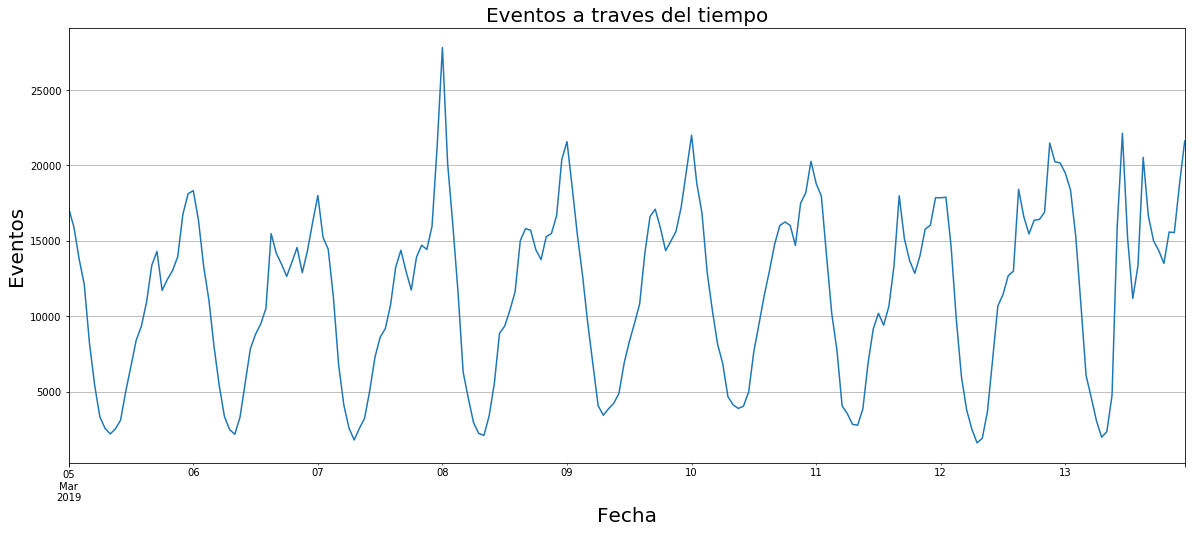

In [143]:
plt=events_hourly.plot(figsize=(20,8),grid=True);
plt.set_title("Eventos a traves del tiempo", fontsize=20);
plt.set_xlabel("Fecha",fontsize=20);
plt.set_ylabel("Eventos",fontsize=20);

In [144]:
#### Se puede ver los datos

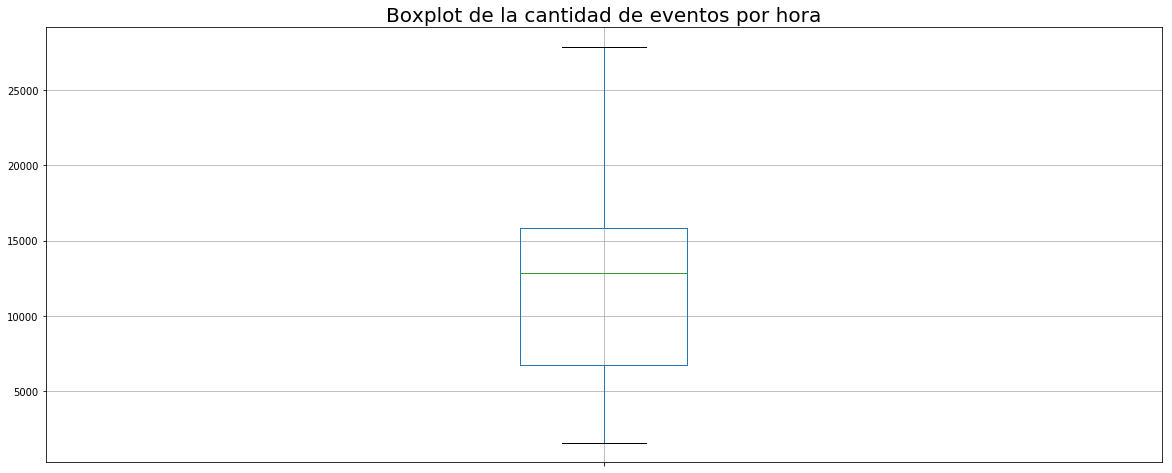

In [145]:
ax = events_hourly.plot(kind='box', figsize=(20, 8), title='Boxplot de la cantidad de eventos por hora', grid=True)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.title.set_size(20)

In [146]:
daily_events=events.resample('D').size()
daily_events.head(10)

date
2019-03-05    240549
2019-03-06    253505
2019-03-07    253706
2019-03-08    285535
2019-03-09    286221
2019-03-10    293091
2019-03-11    268884
2019-03-12    296665
2019-03-13    316267
Freq: D, dtype: int64

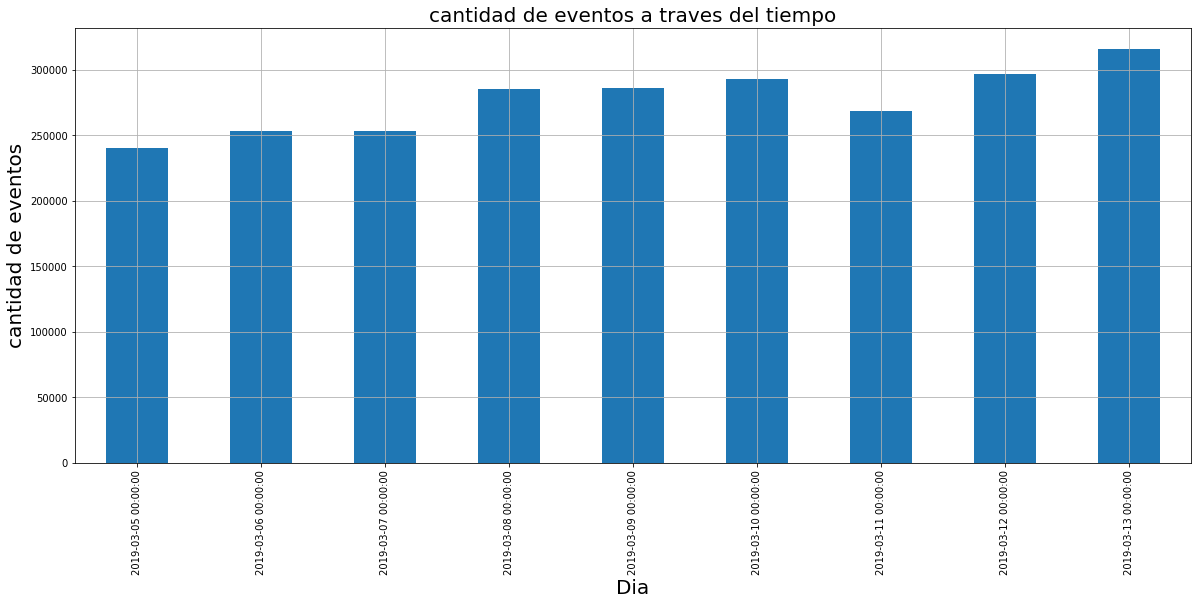

In [147]:
plt=daily_events.plot(kind='bar',figsize=(20,8),grid=True);
plt.set_title("cantidad de eventos a traves del tiempo", fontsize=20);
plt.set_xlabel("Dia",fontsize=20);
plt.set_ylabel("cantidad de eventos",fontsize=20);

## A continuacion se plotea la sumatoria de los eventos en una hora en particular.

Text(0, 0.5, 'Eventos')

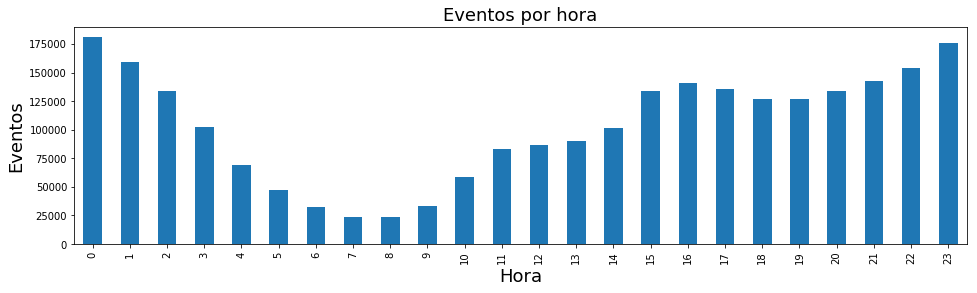

In [148]:
plotHora = events.groupby('Hour').count()['event_id'].plot(kind='bar',figsize=(16,4));

plotHora.set_title("Eventos por hora", fontsize=18)
plotHora.set_xlabel("Hora",fontsize=18)
plotHora.set_ylabel("Eventos", fontsize=18)

In [149]:
events.groupby('Hour').count()['event_id'].max()

181072

In [150]:
events.groupby('Hour').count()['event_id'].min()

23623

 #### Podemos ver que a las 00:00hs se acumula la mayor cantidad de eventos con 181072. Y la menor acumulacion ocurre a las 7am con 23623 eventos.

Text(0, 0.5, 'Eventos')

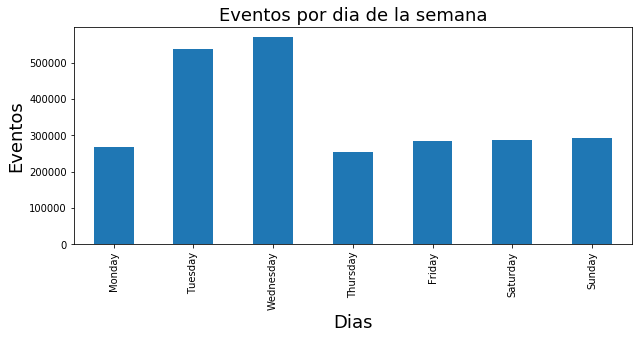

In [151]:
plotSem = events.groupby('Weekday').count()['event_id'].plot(kind='bar',figsize=(10,4));
plotSem.set_title("Eventos por dia de la semana", fontsize=18)
plotSem.set_xlabel("Dias",fontsize=18)
plotSem.set_ylabel("Eventos", fontsize=18)

#### Analizando el grafico y algunas propiedades más del dataframe se puede determinar que el día de la semana que mas eventos ocurren son los Miercoles con 569772, y el dia de la semana en que ocurre menos eventos son los jueves con 253706

In [152]:
 events.groupby('Weekday').count()['event_id'].sort_values(ascending = False).head(1)

Weekday
Wednesday    569772
Name: event_id, dtype: int64

In [153]:
 events.groupby('Weekday').count()['event_id'].sort_values(ascending = True).head(1)

Weekday
Thursday    253706
Name: event_id, dtype: int64

In [154]:
 events.groupby('Weekday').count()['event_id'].min()

253706

In [155]:
 events.groupby('Weekday').count()['event_id'].max()

569772

Text(0, 0.5, 'Eventos')

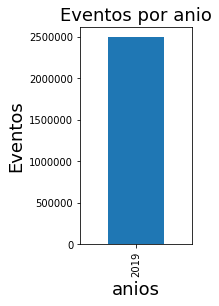

In [156]:
plotAnual = events.groupby('Year').count()['event_id'].plot(kind='bar',figsize=(2,4));

plotAnual.set_title("Eventos por anio", fontsize=18)
plotAnual.set_xlabel("anios",fontsize=18)
plotAnual.set_ylabel("Eventos", fontsize=18)

#### Todos los eventos provienen del mismo año, esto no nos aporta nada, podriamos sacar la columna del dataframe

## Para obtener mas detalle, podemos ver las tablas a continuacion

In [157]:
 events.groupby('Weekday').count()['event_id']

Weekday
Monday       268884
Tuesday      537214
Wednesday    569772
Thursday     253706
Friday       285535
Saturday     286221
Sunday       293091
Name: event_id, dtype: int64

In [158]:
events.groupby('Hour').count()['event_id']

Hour
0     181072
1     159288
2     133891
3     102469
4      69027
5      46961
6      32295
7      23623
8      24076
9      32899
10     58244
11     82888
12     86290
13     89836
14    101452
15    134192
16    140399
17    135168
18    127056
19    126855
20    133759
21    142695
22    154274
23    175714
Name: event_id, dtype: int64

In [159]:
 events.groupby('Year').count()['event_id']

Year
2019    2494423
Name: event_id, dtype: int64

## Aca se pueden apreciar los diferentes tipos de eventos ocurridos en el año...

In [160]:
events['event_id'].nunique()

568

In [161]:
(events.groupby('event_id').size()<=5).sum()

160

In [162]:
(events.groupby('event_id').size()>=3000).sum()

59

### Aca se puede observar un histograma mas descriptivo

### Histograma que muestra la distribucion de los valores para la variable event_id

In [164]:
events['event_id'].value_counts(dropna=False)[0:10]

22     618228
31     417070
161    217846
1      157812
138    100039
162     84898
329     56490
156     53332
33      48581
171     43942
Name: event_id, dtype: int64

Text(0, 0.5, 'Frecuencia')

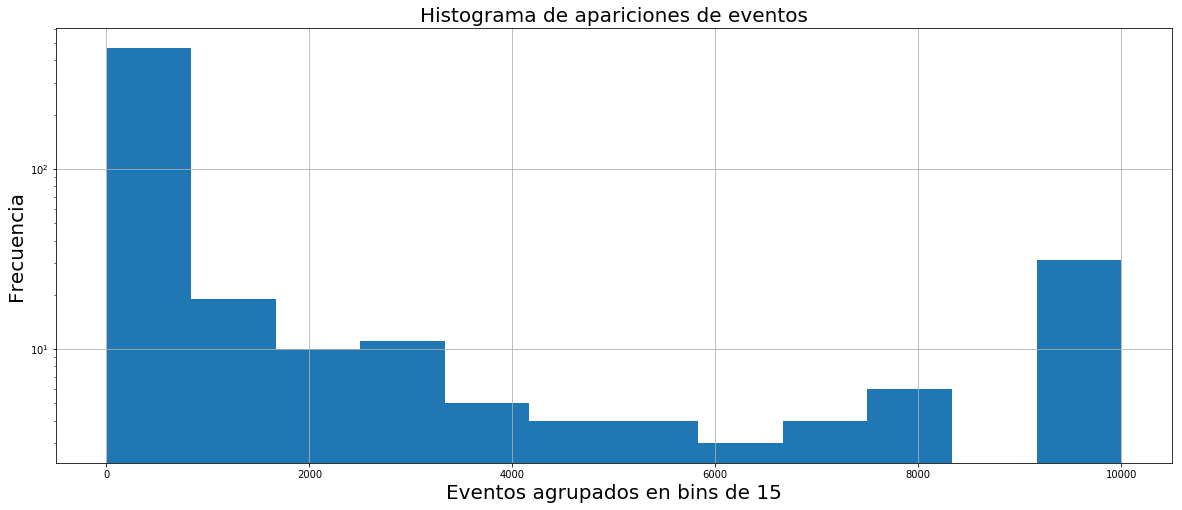

In [165]:
events_count = events.groupby('event_id').size()
events_count_clipped = events_count.clip(lower=0, upper=10000)
ax = events_count_clipped.hist(bins=12, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de eventos', size=20)
ax.set_xlabel("Eventos agrupados en bins de 15",fontsize=20)
ax.set_ylabel("Frecuencia", fontsize=20)

In [166]:
(events.groupby('event_id').size() <= 5).sum()


160

In [167]:

(events.groupby('event_id').size() >= 3000).sum()


59

In [168]:

events['event_id'].isnull().any()


False

In [169]:

events['event_id'].nunique()

568

## Ahora analizaremos desde donde vienen los diferentes eventos

#### #La idea sería filtrar las filas que no representan un pais pero en este caso no podemos, ya que los datos son incoherentes con el nombre real del pais


#### Si quisieramos podriamos sacar la columna del dataframe ya que todos los datos provienen del mismo pais... URUGUAY

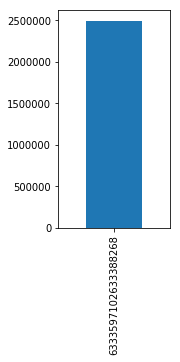

In [170]:
plotDeviceCountryCode=events['device_countrycode'].value_counts()[0:2].plot(kind='bar',figsize=(2,4));



### Al parecer todos los eventos vienen desde un mismo pais

In [171]:
events['application_id'].value_counts(dropna=False)[0:10]

66     325696
64     259084
145    252431
63     181555
103    137513
57     134498
121    123711
212    108489
113     82962
39      76448
Name: application_id, dtype: int64

#### Podemos pensar que tenemos un set de datos para aplicaciones id legitimo, ya que los nulos no son mayoria

Text(0, 0.5, 'Eventos')

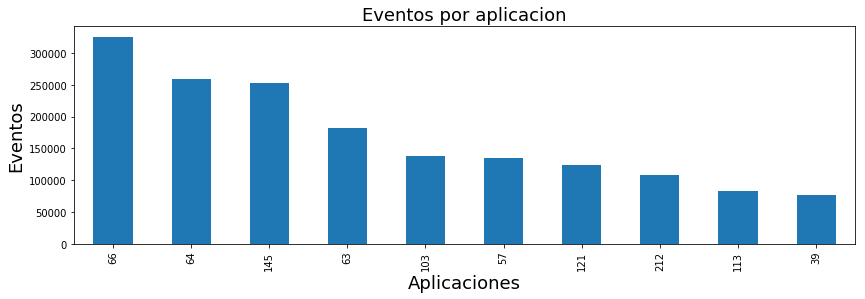

In [172]:
plotAppId=events['application_id'].value_counts()[0:10].plot(kind='bar',figsize=(14,4));
plotAppId.set_title("Eventos por aplicacion", fontsize=18)
plotAppId.set_xlabel("Aplicaciones",fontsize=18)
plotAppId.set_ylabel("Eventos", fontsize=18)

Text(0, 0.5, 'Frecuencia')

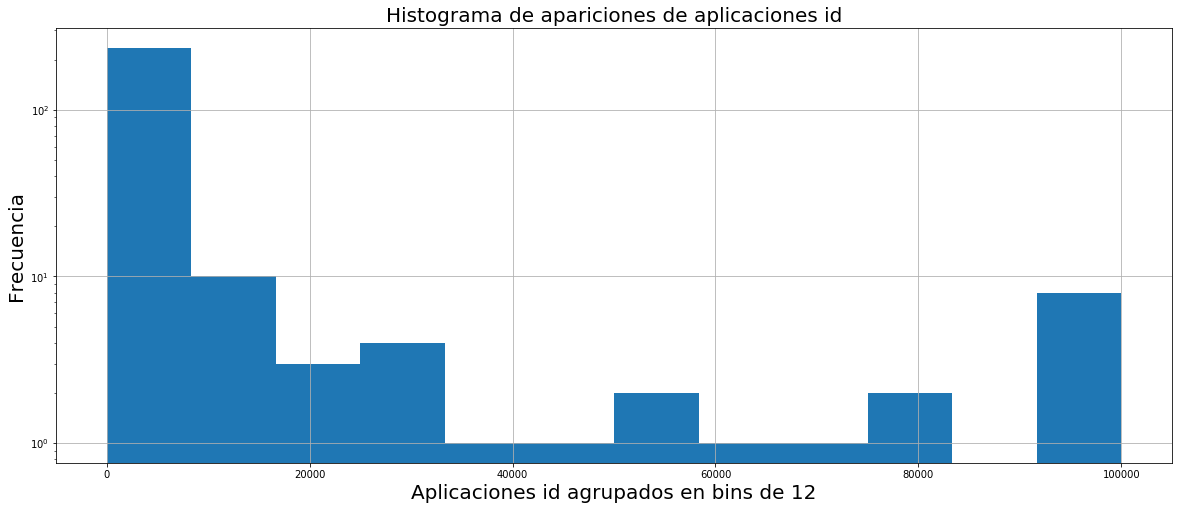

In [173]:
app_count = events.groupby('application_id').size()
app_count_clipped = app_count.clip(lower=0,upper=100000)
ax = app_count_clipped.hist(bins=12, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de aplicaciones id', size=20)
ax.set_xlabel("Aplicaciones id agrupados en bins de 12",fontsize=20)
ax.set_ylabel("Frecuencia", fontsize=20)

In [174]:
events['device_os'].value_counts(dropna=False)[0:5]

NaN              1836756
 7.531669e+18     389811
 6.941825e+18     260861
 2.748831e+18       6110
 5.916187e+18        885
Name: device_os, dtype: int64

#### Dato a tener en cuenta: La gran mayoria de device os son NULOS.

Text(0, 0.5, 'Eventos')

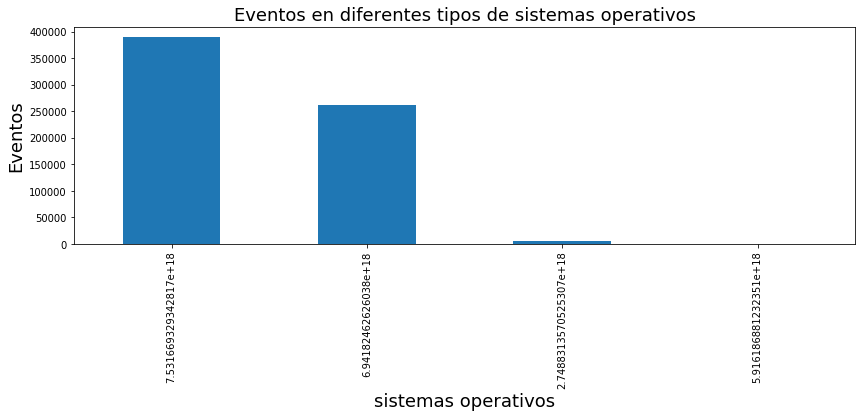

In [175]:
plotDeviceOs=events['device_os'].value_counts()[0:10].plot(kind='bar',figsize=(14,4));
plotDeviceOs.set_title("Eventos en diferentes tipos de sistemas operativos", fontsize=18)
plotDeviceOs.set_xlabel("sistemas operativos",fontsize=18)
plotDeviceOs.set_ylabel("Eventos", fontsize=18)

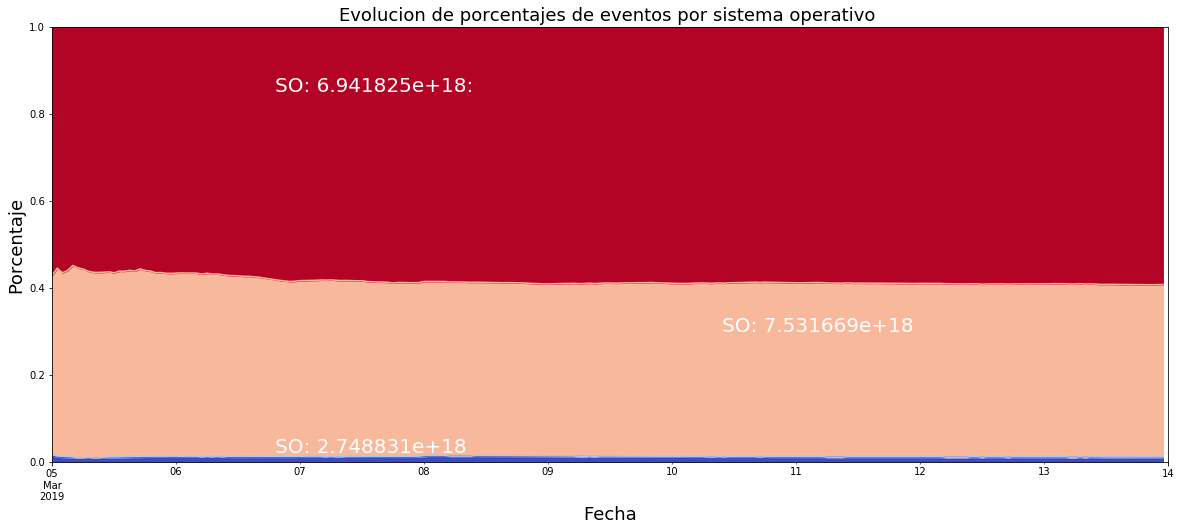

In [176]:
device_size = events.groupby([pd.Grouper(freq='H'), 'device_os']).size()
device_total = device_size.unstack('device_os').cumsum()
row_total = device_total.sum(axis='columns')
device_cum_pct = device_total.div(row_total, axis='index')
ax = device_cum_pct.plot(kind='area', figsize=(20,8), cmap='coolwarm', xlim=('2019-03-05', '2019-03-14'), ylim=(0, 1), legend=False)
ax.set_title("Evolucion de porcentajes de eventos por sistema operativo ", fontsize=18)
ax.set_ylabel("Porcentaje",fontsize=18)
ax.set_xlabel("Fecha", fontsize=18)

plot_kwargs = dict(xycoords='axes fraction', size=20)
ax.annotate(xy=(.6, .3), s='SO: 7.531669e+18', color='w', **plot_kwargs)
ax.annotate(xy=(.2, .85), s='SO: 6.941825e+18: ', color='w', **plot_kwargs)
ax.annotate(xy=(.2, .02), s='SO: 2.748831e+18', color='w', **plot_kwargs);

In [177]:
events['device_os_version'].value_counts(dropna=False)[0:5]

NaN              1472357
 4.353750e+18     277691
 7.391844e+18     104170
 8.824599e+18      77947
 1.627314e+18      58099
Name: device_os_version, dtype: int64

### Se observa que la gran mayoria de datos correspondiente al device os version son NULOS. 

Text(0, 0.5, 'Eventos')

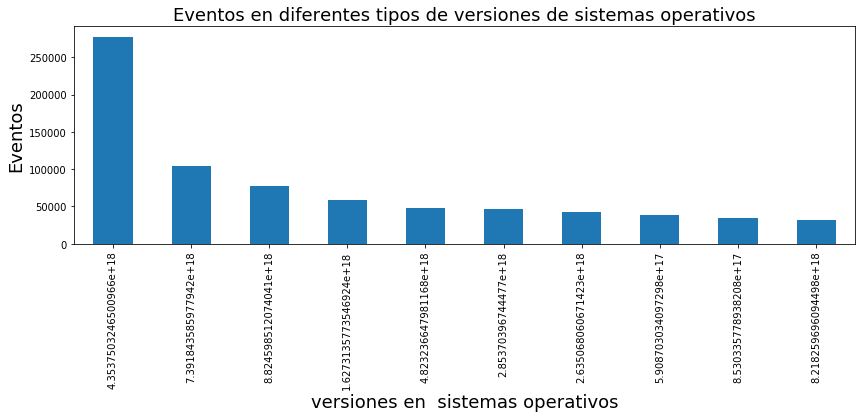

In [178]:
plotDeviceOsV=events['device_os_version'].value_counts()[0:10].plot(kind='bar',figsize=(14,4));
plotDeviceOsV.set_title("Eventos en diferentes tipos de versiones de sistemas operativos", fontsize=18)
plotDeviceOsV.set_xlabel("versiones en  sistemas operativos",fontsize=18)
plotDeviceOsV.set_ylabel("Eventos", fontsize=18)

Text(0, 0.5, 'Frecuencia')

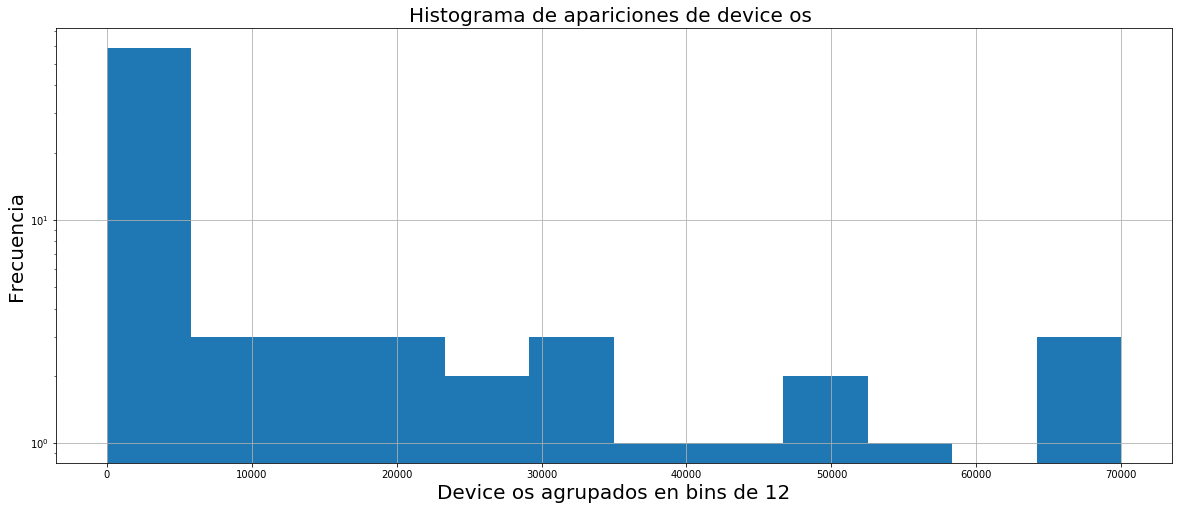

In [179]:
deviceos_count = events.groupby('device_os_version').size()
deviceos_count_clipped = deviceos_count.clip(lower=0,upper=70000)
ax = deviceos_count_clipped.hist(bins=12, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de device os ', size=20)
ax.set_xlabel("Device os agrupados en bins de 12",fontsize=20)
ax.set_ylabel("Frecuencia", fontsize=20)

### Observaremos a continuacion la cantidad de marcas diferentes por dispositivo y sus eventos asociados

In [180]:
events['device_brand'].value_counts(dropna=False)[0:5]

NaN              1329460
 3.083059e+17     579861
 3.812621e+18     115538
 2.208835e+18     113636
 2.987569e+18     107472
Name: device_brand, dtype: int64

#### Se observa que la gran mayoria de marcas son nulas... entonces estamos ploteando con menos de la mitad de datos

Text(0, 0.5, 'Eventos')

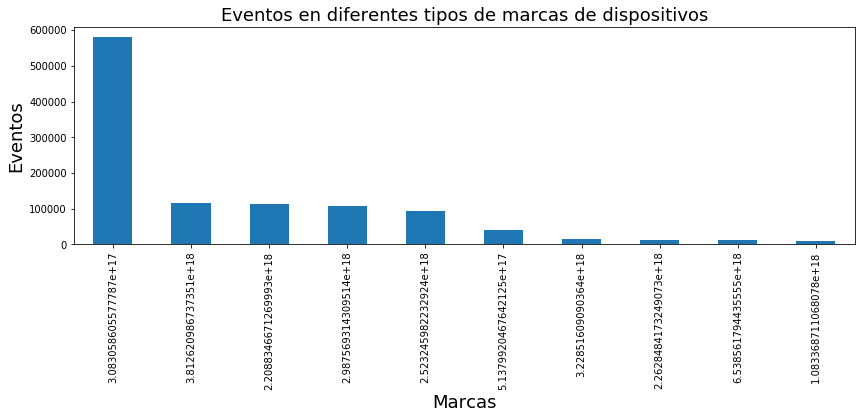

In [181]:
plotDeviceBrand=events['device_brand'].value_counts()[0:10].plot(kind='bar',figsize=(14,4));
plotDeviceBrand.set_title("Eventos en diferentes tipos de marcas de dispositivos", fontsize=18)
plotDeviceBrand.set_xlabel("Marcas",fontsize=18)
plotDeviceBrand.set_ylabel("Eventos", fontsize=18)

#### Podemos determinar que en un tipo de marca se produce la mayor cantidad de eventos, ¡casi 600000 eventos! (Tengamos en cuenta la mayoría de nulos)

Text(0, 0.5, 'Frecuencia')

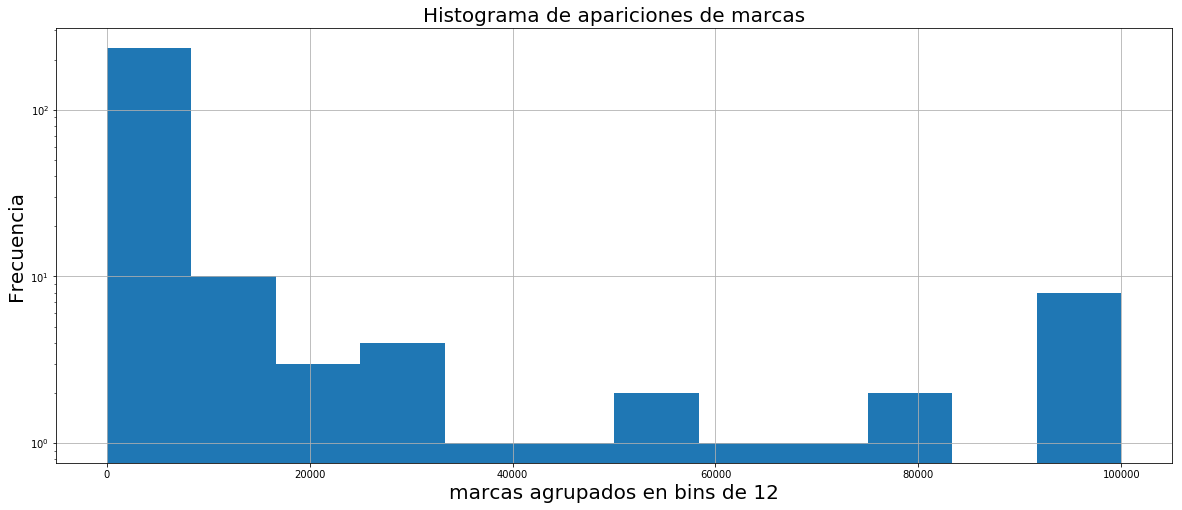

In [182]:
dbrand_count = events.groupby('device_brand').size()
dbrand_count_count_clipped = app_count.clip(lower=0,upper=100000)
ax = dbrand_count_count_clipped.hist(bins=12, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de marcas', size=20)
ax.set_xlabel("marcas agrupados en bins de 12",fontsize=20)
ax.set_ylabel("Frecuencia", fontsize=20)

In [183]:
events['device_model'].value_counts(dropna=False)[0:5]

 2.331947e+18    210697
NaN               87967
 7.787531e+18     74780
 9.149036e+18     66279
 2.066431e+17     60168
Name: device_model, dtype: int64

#### Se puede observar que los nulos ocupan el segundo lugar en los datos para la serie device model con 87967 

Text(0, 0.5, 'Eventos')

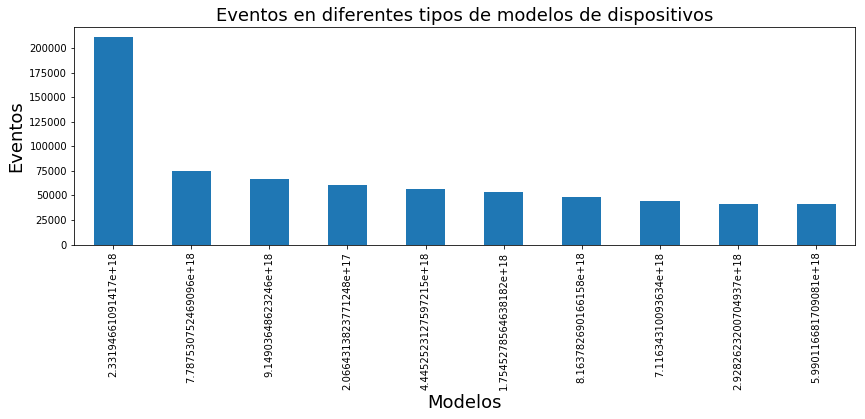

In [184]:
plotDeviceModel=events['device_model'].value_counts()[0:10].plot(kind='bar',figsize=(14,4));
plotDeviceModel.set_title("Eventos en diferentes tipos de modelos de dispositivos", fontsize=18)
plotDeviceModel.set_xlabel("Modelos",fontsize=18)
plotDeviceModel.set_ylabel("Eventos", fontsize=18)

Text(0, 0.5, 'Frecuencia')

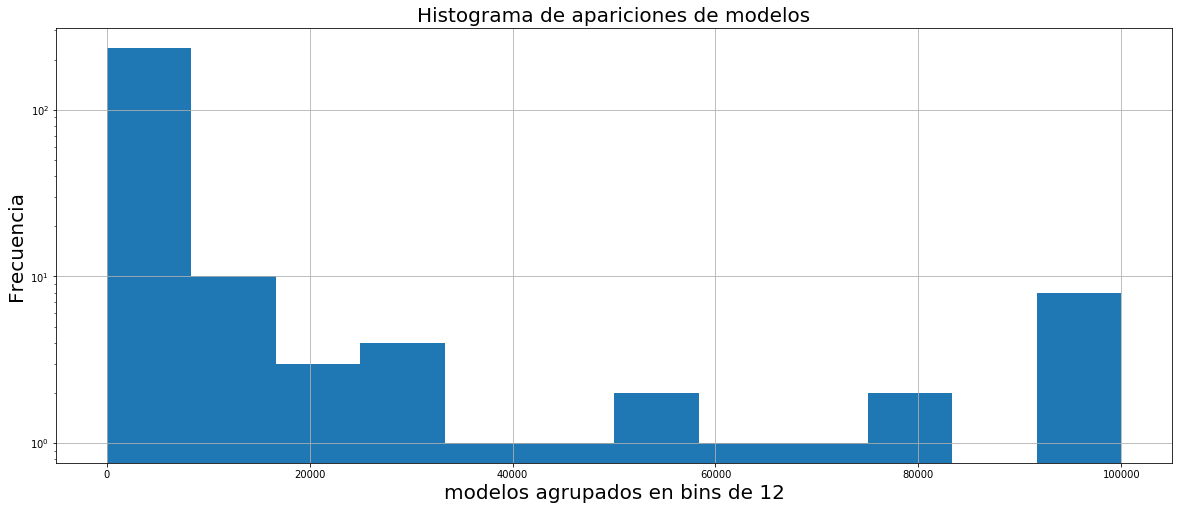

In [185]:
dmodel_count = events.groupby('device_model').size()
dmodel_count_count_clipped = app_count.clip(lower=0,upper=100000)
ax = dmodel_count_count_clipped.hist(bins=12, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de modelos', size=20)
ax.set_xlabel("modelos agrupados en bins de 12",fontsize=20)
ax.set_ylabel("Frecuencia", fontsize=20)

In [186]:
events['device_city'].value_counts(dropna=False)[0:5]

NaN              1879725
 3.800080e+18     561876
 2.551781e+18      11193
 3.258215e+18       4442
 8.223209e+18       4393
Name: device_city, dtype: int64

#### Los nulos ocupan el primer lugar! Dato a tener en cuenta

### Escala logaritmica para el device_city observando los 5 primeros 

Text(0, 0.5, 'Eventos')

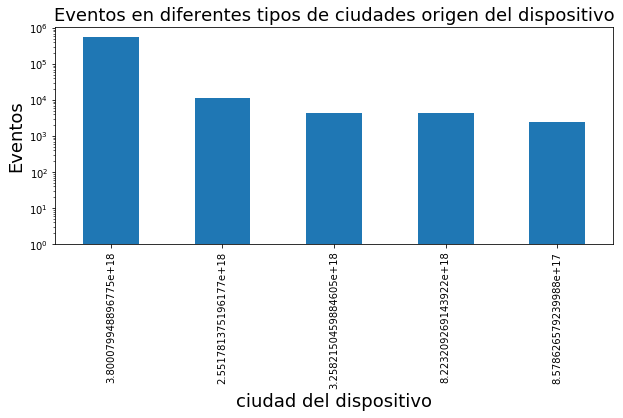

In [187]:
plotDeviceCity=events['device_city'].value_counts()[0:5].plot(log=True,kind='bar',figsize=(10,4));
plotDeviceCity.set_title("Eventos en diferentes tipos de ciudades origen del dispositivo", fontsize=18)
plotDeviceCity.set_xlabel("ciudad del dispositivo",fontsize=18)
plotDeviceCity.set_ylabel("Eventos", fontsize=18)

#### Aca podemos determinar algo parecido a las marcas, predomina un tipo de modelo de dispositivo

Text(0, 0.5, 'Frecuencia')

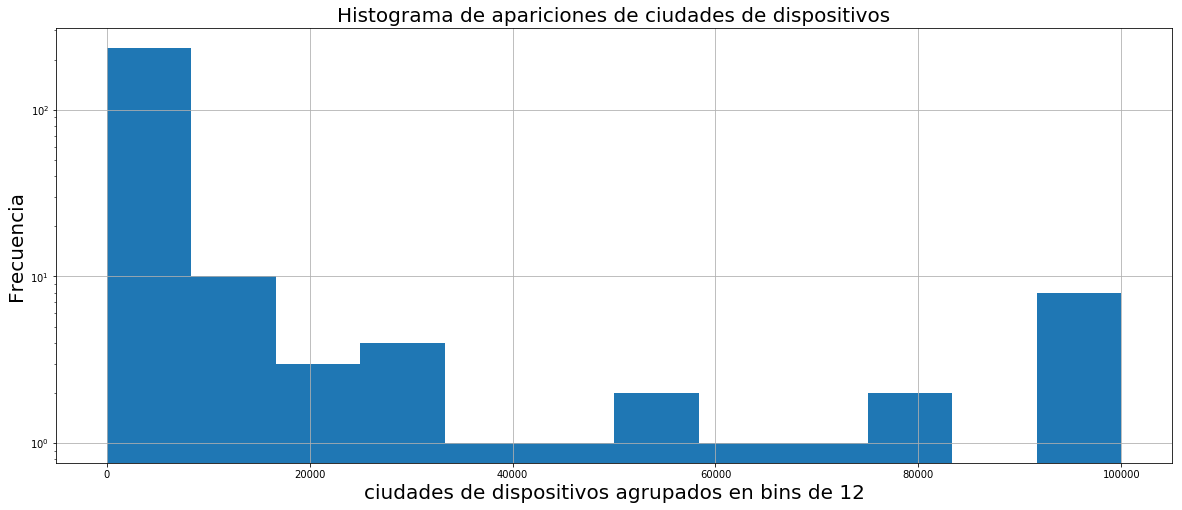

In [188]:
dcity_count = events.groupby('device_city').size()
dcity_count_clipped = app_count.clip(lower=0,upper=100000)
ax = dcity_count_clipped.hist(bins=12, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de ciudades de dispositivos', size=20)
ax.set_xlabel("ciudades de dispositivos agrupados en bins de 12",fontsize=20)
ax.set_ylabel("Frecuencia", fontsize=20)

## Aca podemos ver que muchos eventos son generados con la misma IP (No legitimas)

In [189]:
events['ip_address'].value_counts(dropna=False)[0:15]

1992632945768888579    22640
3162368506662488065    19379
7726314782926052608    17704
2394721645995561079     9777
589886713227299026      7561
7833422721300884983     7197
3564864895681659759     7142
4537476465028897433     7140
2403839579048525602     7100
7410847412569818934     7065
8235954648733428120     6933
7481987231813232849     6855
1093212093074216349     6347
8010533080341024188     6241
2441645233986204328     6108
Name: ip_address, dtype: int64

#### Por que tantas ips tienen tantos eventos??? Hay algunas que se repiten demasiadas veces!

In [190]:
events['ip_address'].nunique()

285212

Text(0, 0.5, 'Eventos')

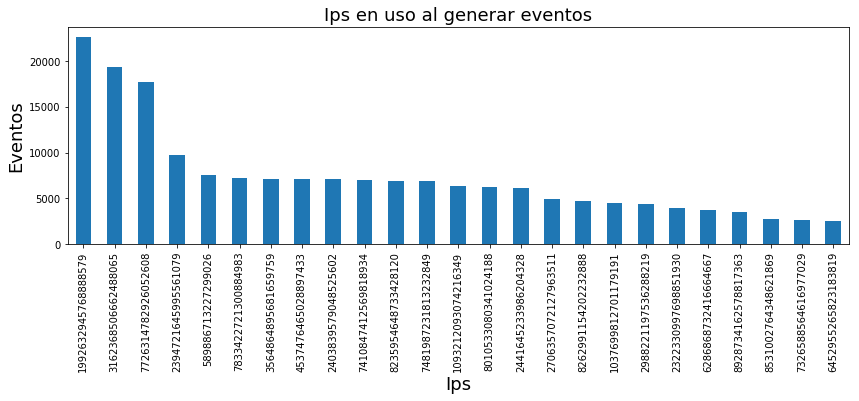

In [191]:
plotIpAddres=events['ip_address'].value_counts()[0:25].plot(kind='bar',figsize=(14,4));
plotIpAddres.set_title("Ips en uso al generar eventos", fontsize=18)
plotIpAddres.set_xlabel("Ips",fontsize=18)
plotIpAddres.set_ylabel("Eventos", fontsize=18)

### podemos obtener un zoom de estas para tener mejor detalle

Text(0, 0.5, 'Eventos')

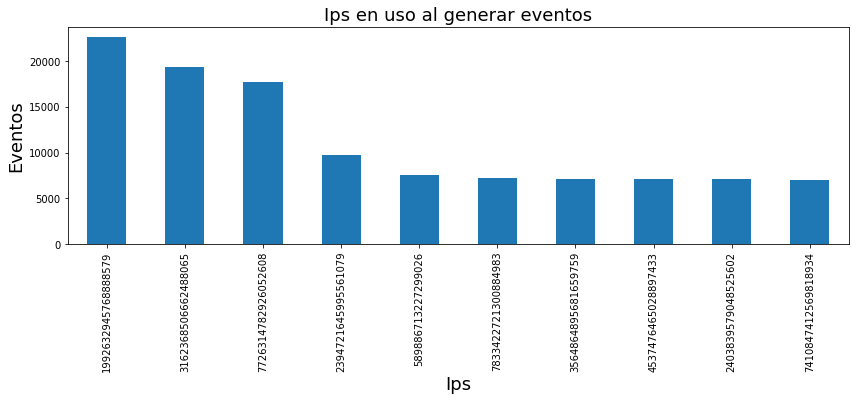

In [192]:
plotIpAddres=events['ip_address'].value_counts()[0:10].plot(kind='bar',figsize=(14,4));
plotIpAddres.set_title("Ips en uso al generar eventos", fontsize=18)
plotIpAddres.set_xlabel("Ips",fontsize=18)
plotIpAddres.set_ylabel("Eventos", fontsize=18)

#### Podemos observar que una IP genera más de 20000 eventos, podemos comenzar a sospechar 

Text(0, 0.5, 'Frecuencia')

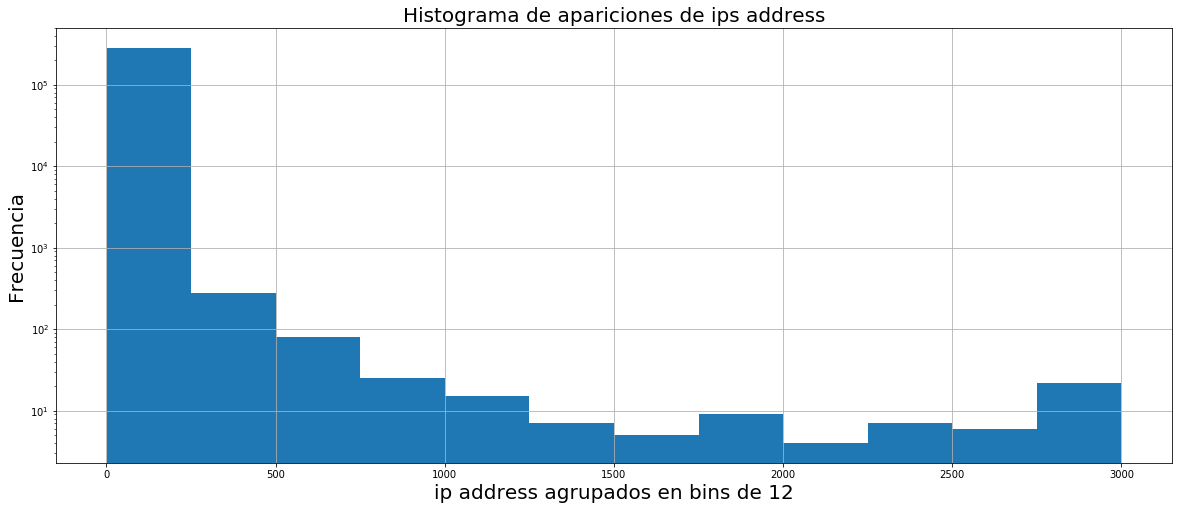

In [193]:
ipA_count = events.groupby('ip_address').size()
ipA_count_clipped = ipA_count.clip(lower=0, upper=3000)
ax = ipA_count_clipped.hist(bins=12, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de ips address', size=20)
ax.set_xlabel("ip address agrupados en bins de 12",fontsize=20)
ax.set_ylabel("Frecuencia", fontsize=20)

### Ahora analizaremos el tipo de referido para los diferentes eventos. Estos referidos pueden ser  apple_ifa o google_advertising_id 

Text(0, 0.5, 'Eventos')

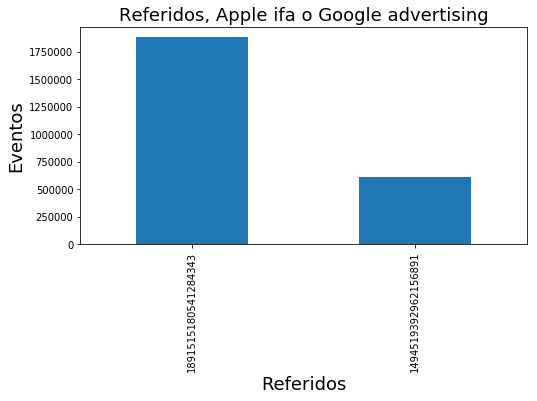

In [194]:
plotRefType=events['ref_type'].value_counts()[0:10].plot(kind='bar',figsize=(8,4));
plotRefType.set_title("Referidos, Apple ifa o Google advertising", fontsize=18)
plotRefType.set_xlabel("Referidos",fontsize=18)
plotRefType.set_ylabel("Eventos", fontsize=18)

In [195]:
events.sample(5)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,Year,Weekday,Hour
date,,,,,,,,,,,,,,,,,,,,,
2019-03-09 05:45:40.694,2019-03-09 05:45:40.694,328,1891515180541284343,5447773909519679121,145,False,6333597102633388268,1.627314e+18,NaN,1.745213e+16,...,NaN,1.020653e+18,NaN,NaN,NaN,9049567058818953700,6.111820e+18,2019,Saturday,5
2019-03-13 13:08:44.789,2019-03-13 13:08:44.789,350,1891515180541284343,2645234562000160813,149,False,6333597102633388268,NaN,3.083059e+17,4.046229e+18,...,NaN,9.215473e+18,NaN,True,NaN,4281350665250822647,6.977049e+18,2019,Wednesday,13
2019-03-07 02:35:59.981,2019-03-07 02:35:59.981,155,1494519392962156891,5365232628602016276,170,False,6333597102633388268,NaN,NaN,2.331947e+18,...,NaN,5.913921e+18,NaN,True,NaN,5504612170153525307,4.621024e+18,2019,Thursday,2
2019-03-12 15:52:39.681,2019-03-12 15:52:39.681,272,1891515180541284343,6235417467923470979,120,False,6333597102633388268,NaN,NaN,NaN,...,NaN,6.168309e+18,NaN,NaN,NaN,6452955265823183819,NaN,2019,Tuesday,15
2019-03-05 00:31:37.807,2019-03-05 00:31:37.807,31,1891515180541284343,3694079704735328513,63,False,6333597102633388268,NaN,2.987569e+18,6.026543e+18,...,NaN,8.820572e+18,NaN,True,NaN,5862954464895782032,6.977049e+18,2019,Tuesday,0


Text(0.2, 0.85, 'Ref type: 1891515180541284343 (posiblemente google_ad_id)')

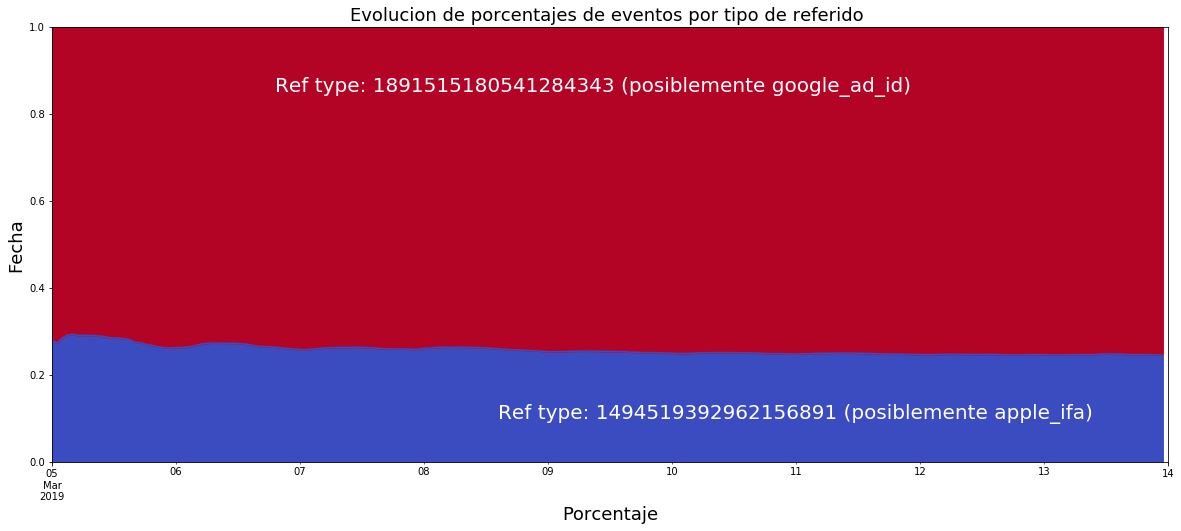

In [196]:
ref_size = events.groupby([pd.Grouper(freq='H'), 'ref_type']).size()
ref_total = ref_size.unstack('ref_type').cumsum()
row_total = ref_total.sum(axis='columns')
ref_cum_pct = ref_total.div(row_total, axis='index')
ax = ref_cum_pct.plot(kind='area', figsize=(20,8), cmap='coolwarm', xlim=('2019-03-05', '2019-03-14'), ylim=(0, 1), legend=False)
ax.set_title("Evolucion de porcentajes de eventos por tipo de referido ", fontsize=18)
ax.set_xlabel("Porcentaje",fontsize=18)
ax.set_ylabel("Fecha", fontsize=18)

plot_kwargs = dict(xycoords='axes fraction', size=20)
ax.annotate(xy=(.4, .1), s='Ref type: 1494519392962156891 (posiblemente apple_ifa)', color='w', **plot_kwargs)
ax.annotate(xy=(.2, .85), s='Ref type: 1891515180541284343 (posiblemente google_ad_id)', color='w', **plot_kwargs)

### Dispositivo asociado con apple if o google advertising

In [197]:
events['ref_hash'].nunique()

196049

In [198]:
events['ref_hash'].value_counts(dropna=False)

7823950631004872496    2913
7298478026707033340    2822
5034957474698180142    2681
5724169280369284055    2524
1706781657278990931    2300
244029859389272148     2240
7526135353349769077    2079
8876061431560425145    2053
99390558091295167      1966
2514745445577342929    1925
7932055701089699678    1880
959309904051180368     1879
2172957424689981672    1737
8938936221115319274    1712
5517347051664000025    1696
7881865551295335841    1680
2911380620292361100    1615
7984059267284799536    1599
3931396627810108588    1558
5929807100024800254    1460
8291491622395815056    1431
6431911391083614553    1398
6290225060459708362    1384
1392381574052047210    1369
524370095063968889     1355
5639133576747886119    1345
2456256724056711249    1339
8847676025636425100    1336
3436575239155975568    1317
6630253456783010456    1312
                       ... 
2485363642280112183       1
2484972078351466770       1
2484937818370132828       1
2488609264033643651       1
7035577248668396067 

Text(0, 0.5, 'Eventos')

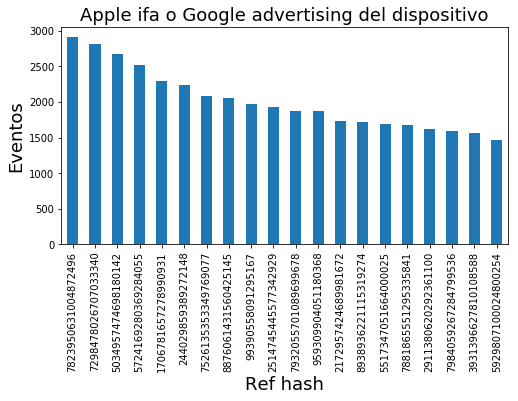

In [199]:
plotRefHash=events['ref_hash'].value_counts()[0:20].plot(kind='bar',figsize=(8,4));
plotRefHash.set_title("Apple ifa o Google advertising del dispositivo", fontsize=18)
plotRefHash.set_xlabel("Ref hash",fontsize=18)
plotRefHash.set_ylabel("Eventos", fontsize=18)

Text(0, 0.5, 'Frecuencia')

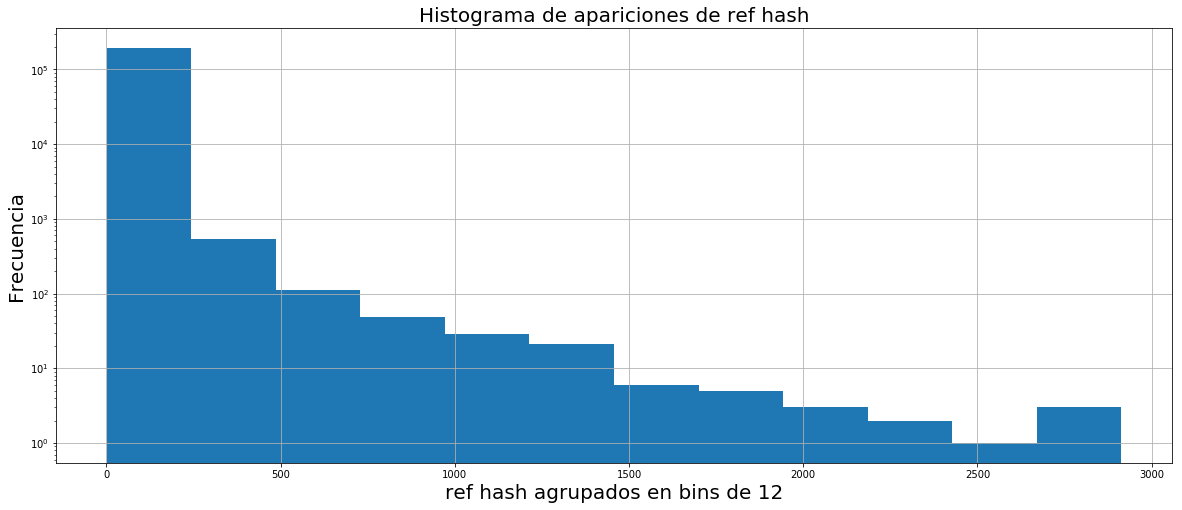

In [200]:
rhash_count = events.groupby('ref_hash').size()
rhash_count_clipped = rhash_count.clip(lower=0, upper=3000)
ax = rhash_count_clipped.hist(bins=12, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de ref hash', size=20)
ax.set_xlabel("ref hash agrupados en bins de 12",fontsize=20)
ax.set_ylabel("Frecuencia", fontsize=20)

In [201]:
events['ref_hash'].nunique()

196049

In [202]:
events['ip_address'].nunique()

285212

In [203]:
events['ref_hash'].isnull().sum()

0

In [204]:
events['ip_address'].isnull().sum()

0

#### Para cada evento se corresponde un ref hash, adherido o a google o a apple. Y tambien se corresponde una unnica ip address

## Ahora podremos observar cuales de los diferentes eventos fueron atribuidos a JAMPP

Text(0, 0.5, 'Eventos')

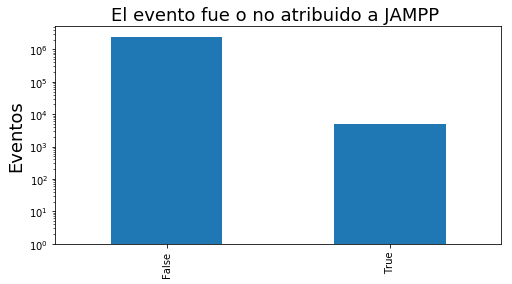

In [205]:
plotAtribuido=events['attributed'].value_counts()[0:20].plot(log=True,kind='bar',figsize=(8,4));
plotAtribuido.set_title("El evento fue o no atribuido a JAMPP ", fontsize=18)
#plotAtribuido.set_xlabel("",fontsize=18)
plotAtribuido.set_ylabel("Eventos", fontsize=18)

In [206]:
events['attributed'].value_counts(dropna=False)

False    2489324
True        5099
Name: attributed, dtype: int64

In [207]:
events['attributed'].value_counts()

False    2489324
True        5099
Name: attributed, dtype: int64

#### Como conclusion sabemos que la mayoría de los eventos no son atribuidos a JAMPP

In [208]:
events['session_user_agent'].value_counts(dropna=False)[0:5]

 3.819516e+18    1461049
 7.164321e+18     649962
 1.160952e+18      78232
NaN                11786
 2.394269e+18      11210
Name: session_user_agent, dtype: int64

#### No es despreciable la cantidad de nulos en el dataframe correspondiente a la columa session user agent

Text(0, 0.5, 'Eventos')

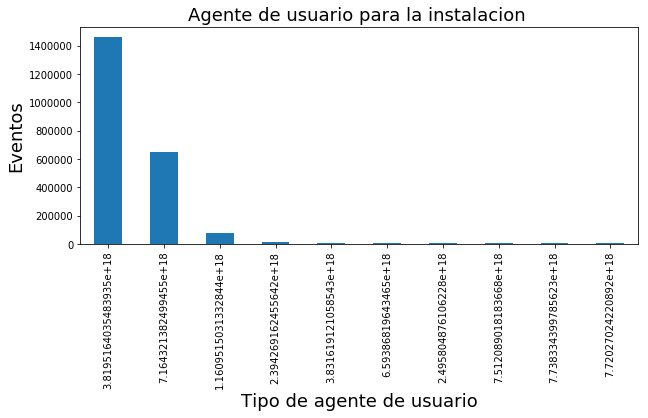

In [209]:

plotAgenteUsuario=events['session_user_agent'].value_counts()[0:10].plot(kind='bar',figsize=(10,4));
plotAgenteUsuario.set_title("Agente de usuario para la instalacion ", fontsize=18)
plotAgenteUsuario.set_xlabel("Tipo de agente de usuario",fontsize=18)
plotAgenteUsuario.set_ylabel("Eventos", fontsize=18)

Text(0, 0.5, 'Frecuencia')

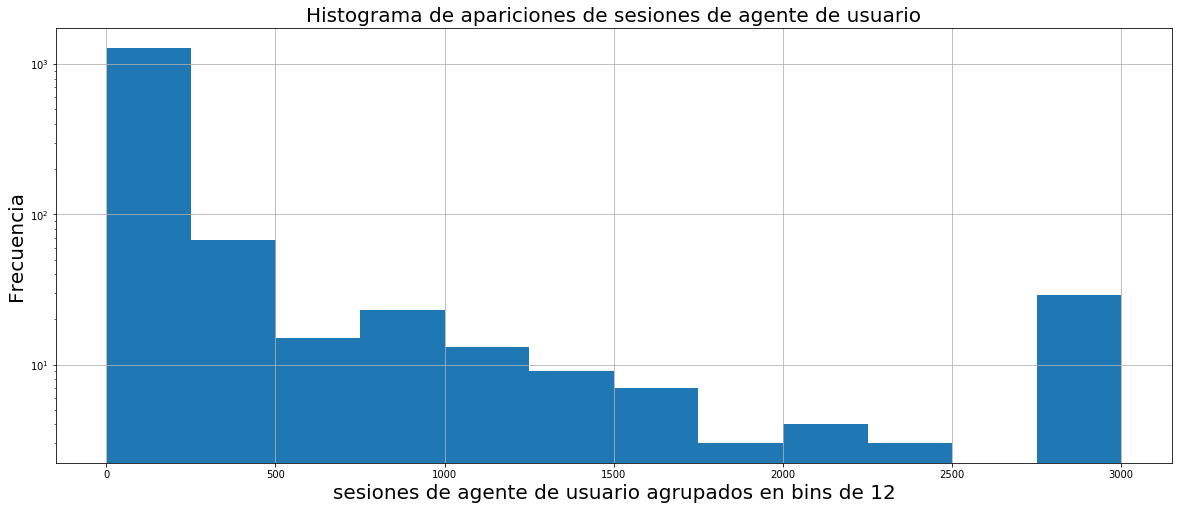

In [210]:
suagent_count = events.groupby('session_user_agent').size()
suagent_count_clipped = suagent_count.clip(lower=0, upper=3000)
ax = suagent_count_clipped.hist(bins=12, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de sesiones de agente de usuario', size=20)
ax.set_xlabel("sesiones de agente de usuario agrupados en bins de 12",fontsize=20)
ax.set_ylabel("Frecuencia", fontsize=20)

In [211]:
events['trans_id'].value_counts(dropna=False)[0:5]

NaN                                                                                                              2494341
{hash}                                                                                                                33
0                                                                                                                     16
103430dcab4b60eb4f                                                                                                     9
433f38e2c758468ab632dcab7281d4be_Y2NhPTEwLzI1LzIwMTggMTA6Mjk6MjUgUE0mb2ZmZXJJZD0zMzQ1NjQ0NiZhZmZJZD0yMjMyNzUx          7
Name: trans_id, dtype: int64

#### Los datos son totalmente despreciables, la  columna trans id se puede eliminar

In [212]:
events['user_agent'].value_counts(dropna=False)[0:5]

NaN              1102896
 2.394269e+18      42325
 7.720270e+18      37523
 6.593868e+18      36173
 5.930547e+18      35950
Name: user_agent, dtype: int64

#### La columna tiene muchos nulos!!! Tener en cuenta eso

Text(0, 0.5, 'Eventos')

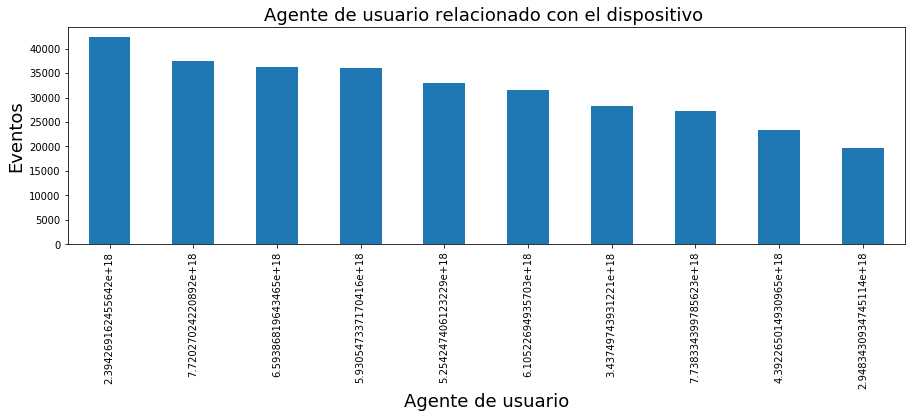

In [213]:
plotUserAgent=events['user_agent'].value_counts()[0:10].plot(kind='bar',figsize=(15,4));
plotUserAgent.set_title("Agente de usuario relacionado con el dispositivo ", fontsize=18)
plotUserAgent.set_xlabel("Agente de usuario",fontsize=18)
plotUserAgent.set_ylabel("Eventos", fontsize=18)

#### Los 10 mas populares se pueden observar del grafico de arriba

Text(0, 0.5, 'Frecuencia')

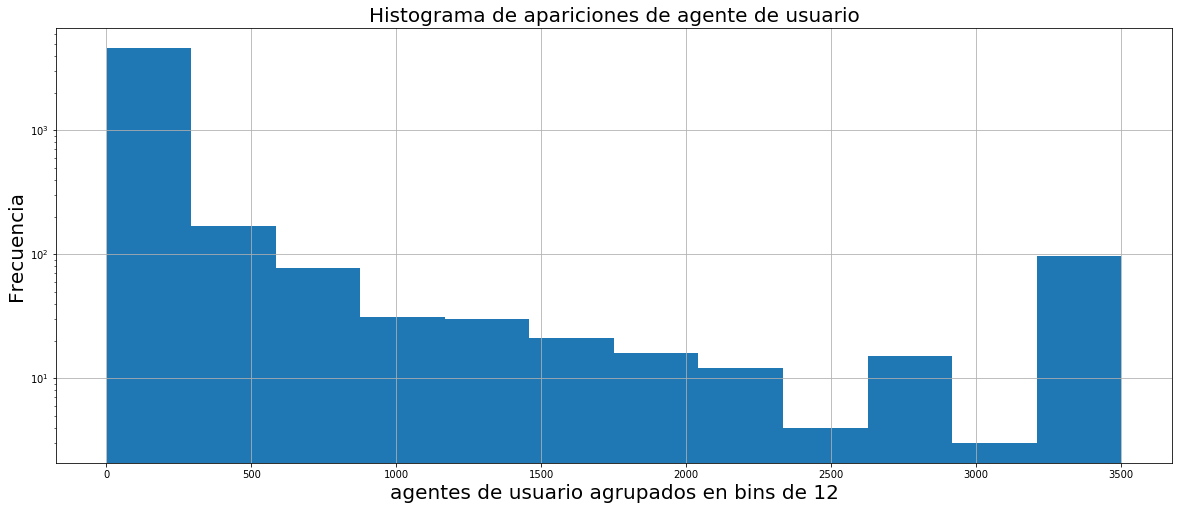

In [214]:
uagent_count = events.groupby('user_agent').size()
uagent_count_clipped = uagent_count.clip(lower=0, upper=3500)
ax = uagent_count_clipped.hist(bins=12, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de agente de usuario', size=20)
ax.set_xlabel("agentes de usuario agrupados en bins de 12",fontsize=20)
ax.set_ylabel("Frecuencia", fontsize=20)

Text(0, 0.5, 'Eventos')

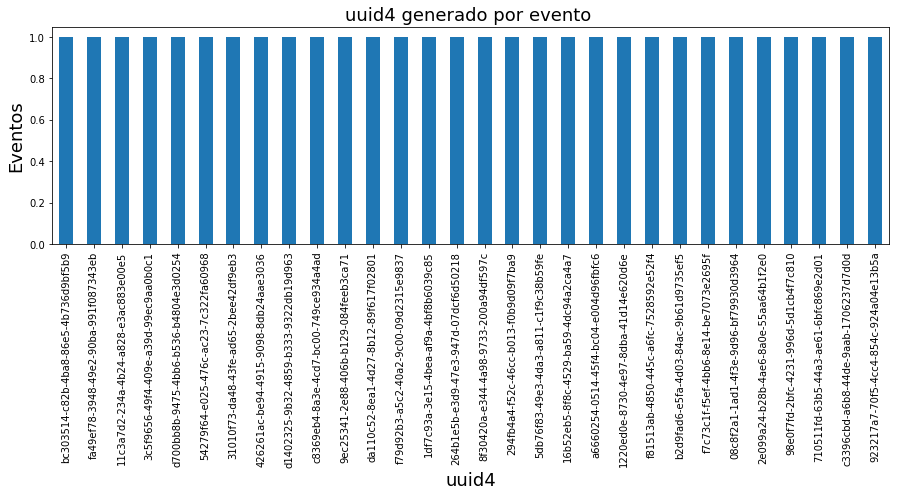

In [215]:
plotEventUuid4=events['event_uuid'].value_counts()[0:30].plot(kind='bar',figsize=(15,4));
plotEventUuid4.set_title("uuid4 generado por evento ", fontsize=18)
plotEventUuid4.set_xlabel("uuid4",fontsize=18)
plotEventUuid4.set_ylabel("Eventos", fontsize=18)

In [216]:
events['event_uuid'].nunique()

2489324

In [217]:
len(events)

2494423

In [218]:
events['event_uuid'].isnull().sum()

5099

In [219]:
events['event_uuid'].nunique() + events['event_uuid'].isnull().sum() == len(events)

True

### Podemos sacar la conclusion que todos los eventos se corresponden con un unico uuid, salvo 5099 eventos

#### De este ultimo grafico podemos sacar la conclusion que por cada evento se genera un unico uuid4

In [220]:
events['carrier'].value_counts(dropna=False)[0:5]

NaN              1877989
 2.248157e+17     436983
 1.179587e+18      80958
 7.855224e+18      58478
 6.948828e+18      29574
Name: carrier, dtype: int64

#### Predominan los nulos en la columna carrier

Text(0, 0.5, 'Eventos')

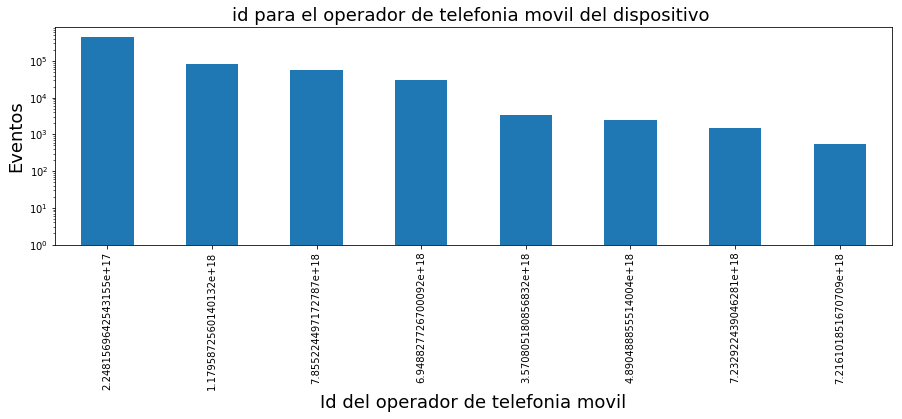

In [221]:
plotCarrier=events['carrier'].value_counts()[0:8].plot(log=True,kind='bar',figsize=(15,4));
plotCarrier.set_title("id para el operador de telefonia movil del dispositivo ", fontsize=18)
plotCarrier.set_xlabel("Id del operador de telefonia movil",fontsize=18)
plotCarrier.set_ylabel("Eventos", fontsize=18)

#### Podemos observar que predomina 1 telefonía movil, y que 4 almacenan la mayoría de eventos, por eso se procede con el plot logaritmico

Text(0, 0.5, 'Frecuencia')

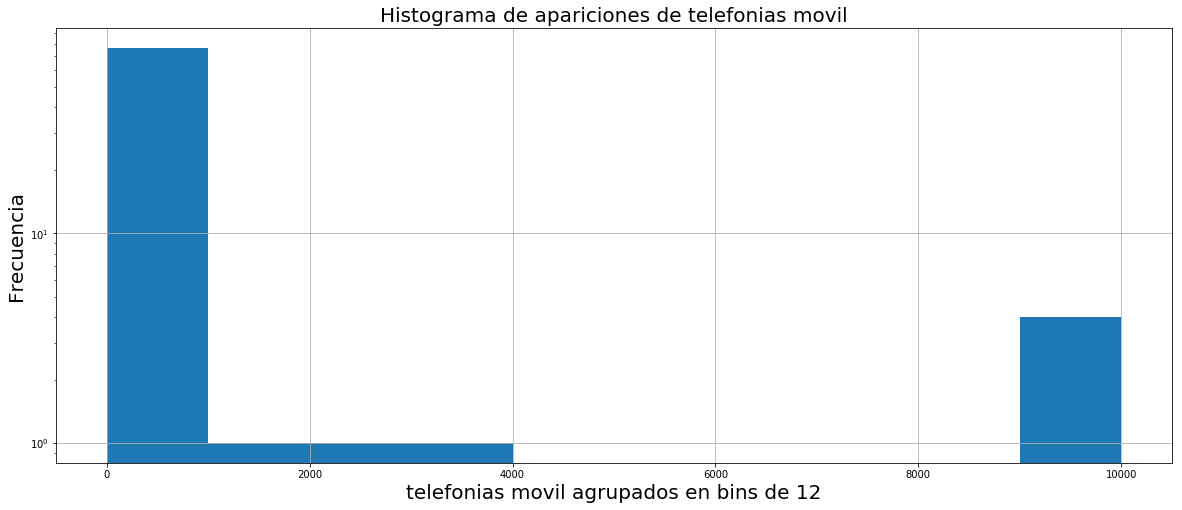

In [222]:
carrier_count = events.groupby('carrier').size()
carrier_count_clipped = carrier_count.clip(lower=0, upper=10000)
ax = carrier_count_clipped.hist(bins=10, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de telefonias movil', size=20)
ax.set_xlabel("telefonias movil agrupados en bins de 12",fontsize=20)
ax.set_ylabel("Frecuencia", fontsize=20)

#### Se puede ver una clara diferencia

Text(0, 0.5, 'Eventos')

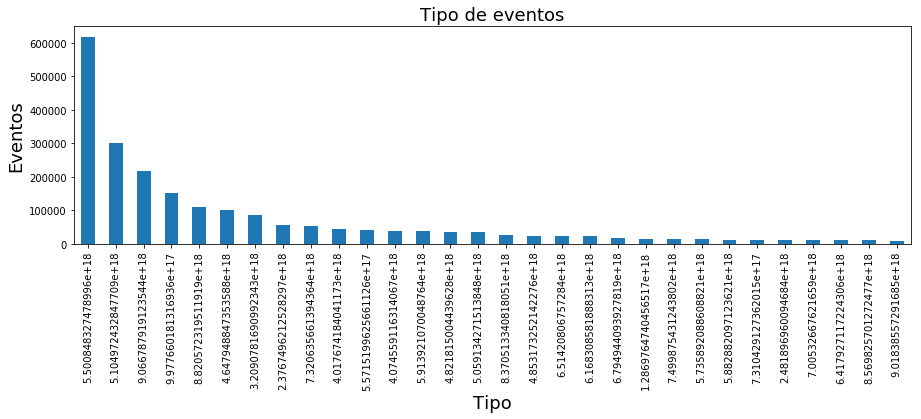

In [223]:
plotKind=events['kind'].value_counts()[0:30].plot(kind='bar',figsize=(15,4));
plotKind.set_title("Tipo de eventos", fontsize=18)
plotKind.set_xlabel("Tipo",fontsize=18)
plotKind.set_ylabel("Eventos", fontsize=18)

Text(0, 0.5, 'Frecuencia')

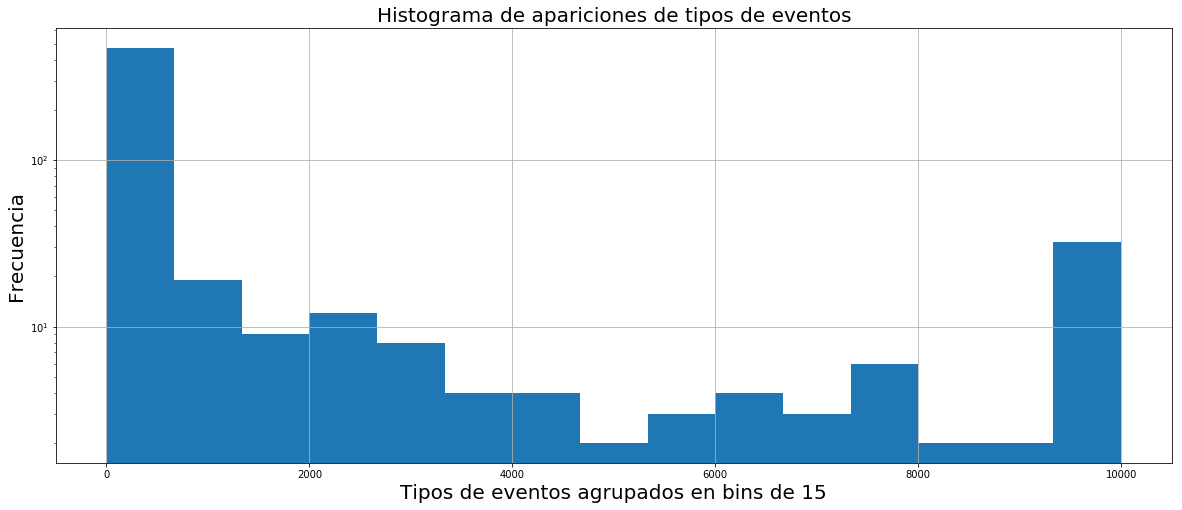

In [224]:
kind_count = events.groupby('kind').size()
kind_count_clipped = kind_count.clip(lower=0, upper=10000)
ax = kind_count_clipped.hist(bins=15, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de tipos de eventos', size=20)
ax.set_xlabel("Tipos de eventos agrupados en bins de 15",fontsize=20)
ax.set_ylabel("Frecuencia", fontsize=20)

In [225]:
events['kind'].nunique()

583

In [226]:
events['event_id'].nunique()

568

### Podemos ver que predomina un tipo de evento, ¿Que conclusion podemos sacar con este? ¿Cual evento podría ser?

Text(0, 0.5, 'Eventos')

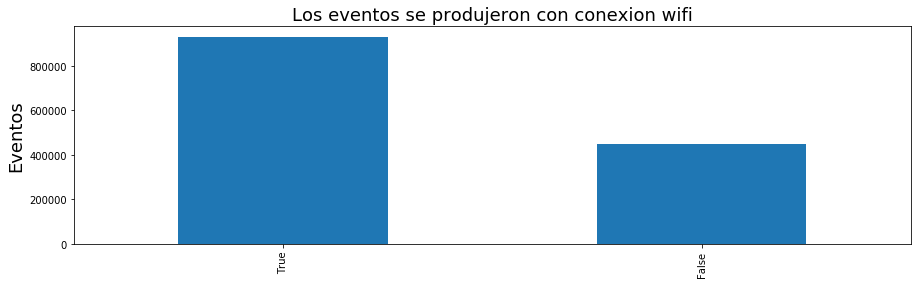

In [227]:
plotWifi=events['wifi'].value_counts()[0:30].plot(kind='bar',figsize=(15,4));
plotWifi.set_title("Los eventos se produjeron con conexion wifi", fontsize=18)
#plotWifi.set_xlabel("",fontsize=18)
plotWifi.set_ylabel("Eventos", fontsize=18)

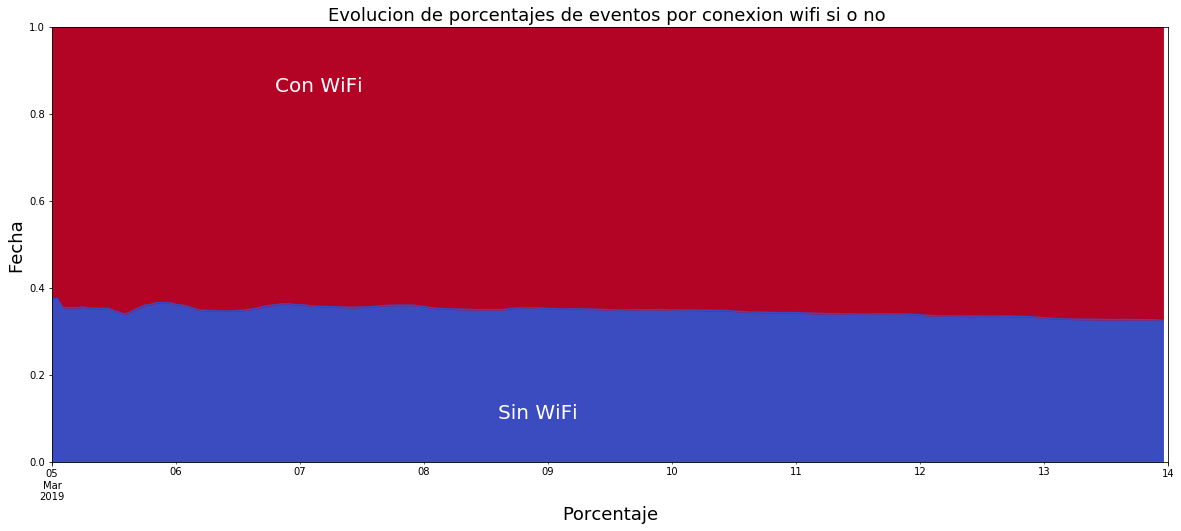

In [228]:
wifi_size = events.groupby([pd.Grouper(freq='H'), 'wifi']).size()
wifi_total = wifi_size.unstack('wifi').cumsum()
row_total = wifi_total.sum(axis='columns')
wifi_cum_pct = wifi_total.div(row_total, axis='index')
ax = wifi_cum_pct.plot(kind='area', figsize=(20,8), cmap='coolwarm', xlim=('2019-03-05', '2019-03-14'), ylim=(0, 1), legend=False)
ax.set_title("Evolucion de porcentajes de eventos por conexion wifi si o no ", fontsize=18)
ax.set_xlabel("Porcentaje",fontsize=18)
ax.set_ylabel("Fecha", fontsize=18)

plot_kwargs = dict(xycoords='axes fraction', size=20)
ax.annotate(xy=(.4, .1), s='Sin WiFi', color='w', **plot_kwargs)
ax.annotate(xy=(.2, .85), s='Con WiFi', color='w', **plot_kwargs);

#### Los eventos se produjeron en mayoría por conexion wifi

Text(0, 0.5, 'Eventos')

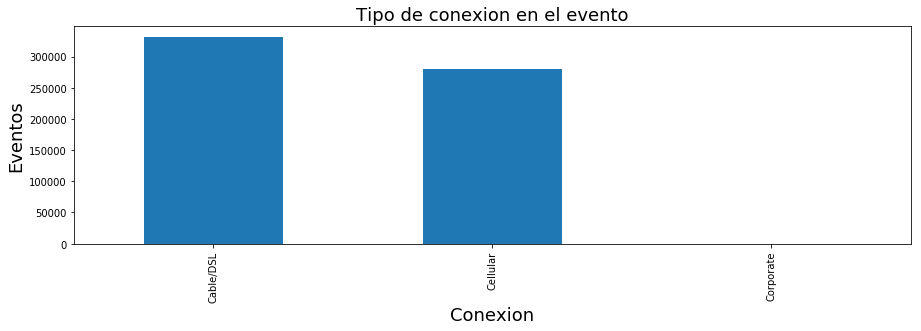

In [229]:
plotConnectType=events['connection_type'].value_counts()[0:30].plot(kind='bar',figsize=(15,4));
plotConnectType.set_title("Tipo de conexion en el evento", fontsize=18)
plotConnectType.set_xlabel("Conexion",fontsize=18)
plotConnectType.set_ylabel("Eventos", fontsize=18)

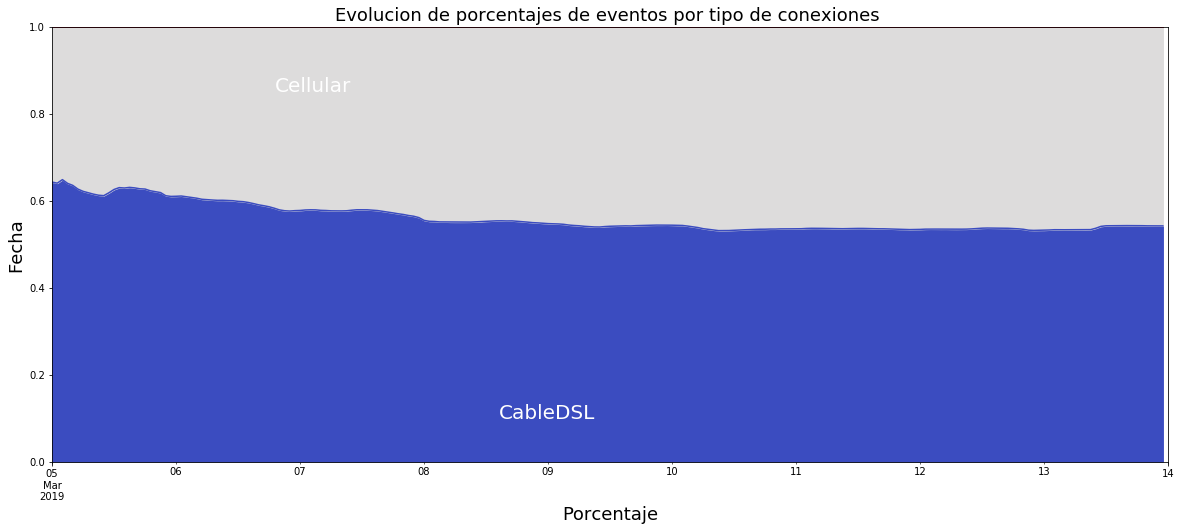

In [230]:
conexion_size = events.groupby([pd.Grouper(freq='H'), 'connection_type']).size()
conexion_total = conexion_size.unstack('connection_type').cumsum()
row_total = conexion_total.sum(axis='columns')
conexion_cum_pct = conexion_total.div(row_total, axis='index')
ax = conexion_cum_pct.plot(kind='area', figsize=(20,8), cmap='coolwarm', xlim=('2019-03-05', '2019-03-14'), ylim=(0, 1), legend=False)
ax.set_title("Evolucion de porcentajes de eventos por tipo de conexiones ", fontsize=18)
ax.set_xlabel("Porcentaje",fontsize=18)
ax.set_ylabel("Fecha", fontsize=18)

plot_kwargs = dict(xycoords='axes fraction', size=20)
ax.annotate(xy=(.4, .1), s='CableDSL', color='w', **plot_kwargs)
ax.annotate(xy=(.2, .85), s='Cellular', color='w', **plot_kwargs);

### Se pueden observar 3 tipos de conexiones, la predominante es CABLE/DSL o sea que se producen más eventos desde una casa (o variantes) , la segunda es una conexion movil y por ultimo se encuentran las conexiones corporativas.

Text(0, 0.5, 'Eventos')

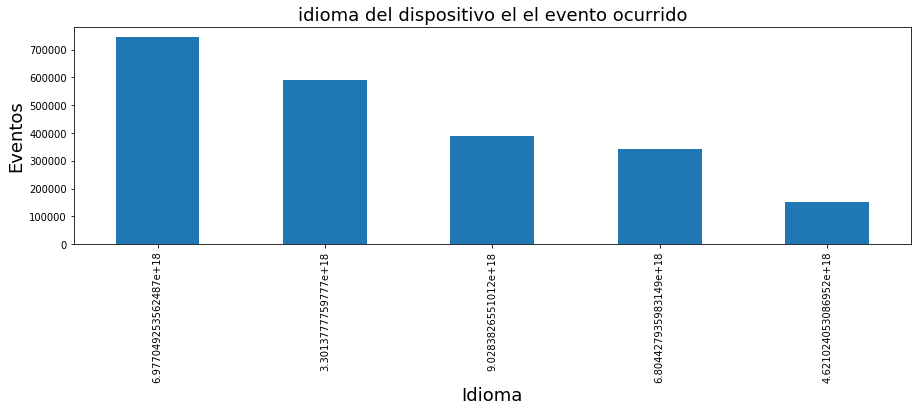

In [231]:
plotDLenguage=events['device_language'].value_counts()[0:5].plot(kind='bar',figsize=(15,4));
plotDLenguage.set_title("idioma del dispositivo el el evento ocurrido", fontsize=18)
plotDLenguage.set_xlabel("Idioma",fontsize=18)
plotDLenguage.set_ylabel("Eventos", fontsize=18)

Text(0, 0.5, 'Frecuencia')

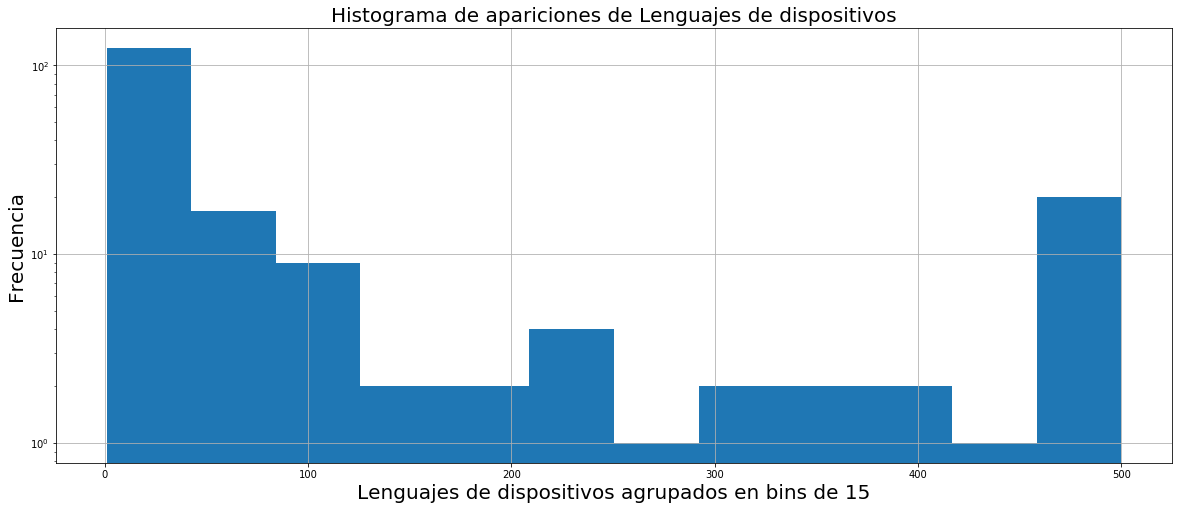

In [232]:
dlanguage_count = events.groupby('device_language').size()
dlanguage_count_clipped = dlanguage_count.clip(lower=0, upper=500)
ax = dlanguage_count_clipped.hist(bins=12, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de Lenguajes de dispositivos', size=20)
ax.set_xlabel("Lenguajes de dispositivos agrupados en bins de 15",fontsize=20)
ax.set_ylabel("Frecuencia", fontsize=20)

In [233]:
events['device_language'].value_counts(dropna=False)[0:20]

 6.977049e+18    745898
 3.301378e+18    589865
 9.028383e+18    388832
 6.804428e+18    340624
 4.621024e+18    150143
NaN               87819
 4.077062e+17     53277
 2.822843e+17     28294
 4.060930e+18     25943
 3.095856e+18     25635
 6.111820e+18     18314
 1.526421e+18     10181
 1.193279e+18      6968
 6.035180e+18      3681
 3.177265e+18      3077
 3.695787e+17      2622
 6.535228e+18      2201
 2.554251e+18      1465
 1.101539e+17       845
 5.649026e+18       740
Name: device_language, dtype: int64

#### Podemos ver una alta variedad de lenguajes para los diferentes dispositivos en los que se realizaron eventos